# Clustering Analysis

In [20]:
import pandas as pd
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [21]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT'].copy()

In [23]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [25]:
import numpy as np
import numpy as np

import numpy as np

def kmeans_numpy(X, n_clusters, tol=1e-4, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    print(centroids)

    for iteration in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of data points in each cluster
        new_centroids = []

        # Loop over each cluster (i)
        for i in range(n_clusters):
            # Select the data points that belong to cluster i using boolean indexing
            cluster_points = X[labels == i]

            # Calculate the mean (average) of the selected data points along each feature axis (columns)
            cluster_mean = np.mean(cluster_points, axis=0)

            # Set the new centroid for cluster i
            new_centroids.append(cluster_mean)

        # Calculate the change in centroids
        new_centroids = np.array(new_centroids)
        centroid_change = np.linalg.norm(new_centroids - centroids)

        # Check for convergence based on the tolerance
        if centroid_change < tol:
            break

        centroids = new_centroids

    return labels, centroids

# Example usage:
# Replace X with your data and set the desired number of clusters.
# labels, centroids = kmeans_numpy(X, n_clusters=3)


In [26]:
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=299, centers=3, random_state=0)

# Apply your K-means implementation
n_clusters = 3
my_labels, my_centroids = kmeans_numpy(X, n_clusters)

print("My K-means Centroids:")
print(my_centroids)
#print(my_labels)


[[ 2.69858199 -0.67295975]
 [-2.4712725   3.15598541]
 [ 3.13950603  5.64031528]]
My K-means Centroids:
[[ 1.87178417  0.76251893]
 [-1.76996129  2.79025379]
 [ 0.86819253  4.43996047]]


In [27]:
from sklearn.cluster import KMeans

# Create a K-means model using scikit-learn
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
sklearn_labels = kmeans.fit_predict(X)

print("Scikit-learn K-means Centroids:")
print(kmeans.cluster_centers_)


Scikit-learn K-means Centroids:
[[ 1.87178417  0.76251893]
 [ 0.86819253  4.43996047]
 [-1.76996129  2.79025379]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Compare labels
print("Labels Comparison:")
print("My Implementation Labels:", my_labels[:10])
print("Scikit-learn Labels:", sklearn_labels[:10])

# Compare centroids
print("\nCentroids Comparison:")
print("My Implementation Centroids:")
print(my_centroids)
print("\nScikit-learn Centroids:")
print(kmeans.cluster_centers_)


Labels Comparison:
My Implementation Labels: [2 0 2 1 0 1 2 2 0 1]
Scikit-learn Labels: [1 0 1 2 0 2 1 1 0 2]

Centroids Comparison:
My Implementation Centroids:
[[ 1.87178417  0.76251893]
 [-1.76996129  2.79025379]
 [ 0.86819253  4.43996047]]

Scikit-learn Centroids:
[[ 1.87178417  0.76251893]
 [ 0.86819253  4.43996047]
 [-1.76996129  2.79025379]]


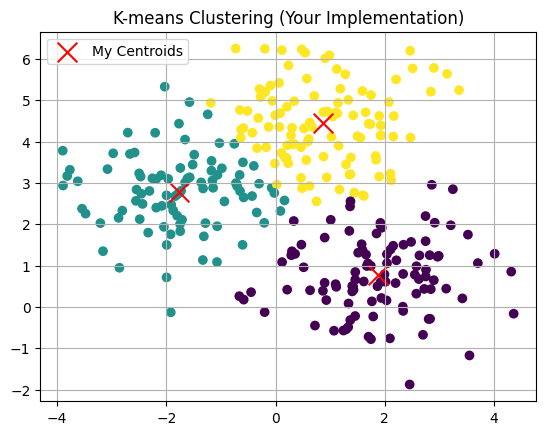

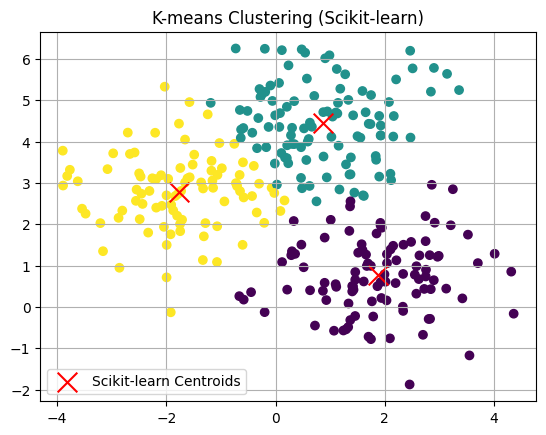

In [29]:
import matplotlib.pyplot as plt

# Plot data points with colors based on cluster assignments (your implementation)
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis')
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], c='red', marker='x', s=200, label='My Centroids')
plt.title('K-means Clustering (Your Implementation)')
plt.legend()
plt.grid()
plt.show()

# Plot data points with colors based on cluster assignments (scikit-learn)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Scikit-learn Centroids')
plt.title('K-means Clustering (Scikit-learn)')
plt.legend()
plt.grid()
plt.show()


In [30]:
import numpy as np

def rbf_kernel(x, y, gamma=1.0):
    # Radial Basis Function (RBF) kernel
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

def kernel_kmeans_numpy(X, n_clusters, max_iters=100, gamma=1.0):
    # Initialize cluster assignments randomly
    #np.random.seed(0)
    labels = np.random.choice(n_clusters, X.shape[0])

    for _ in range(max_iters):
        # Compute the kernel matrix
        K = np.zeros((X.shape[0], n_clusters))
        for i in range(X.shape[0]):
            for j in range(n_clusters):
                K[i, j] = rbf_kernel(X[i], X[labels == j].mean(axis=0), gamma)

        # Update cluster assignments
        new_labels = np.argmin(K, axis=1)

        # Check for convergence
        if np.all(labels == new_labels):
            break

        labels = new_labels

    return labels


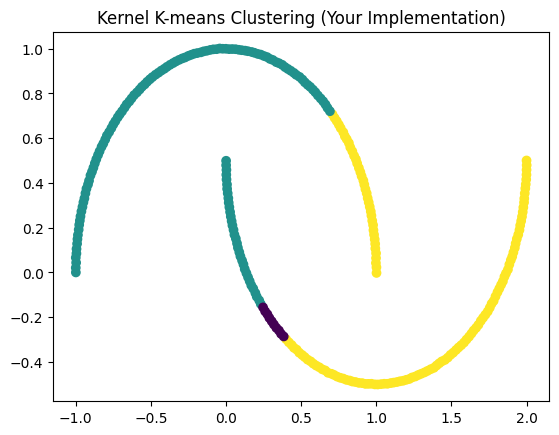

In [31]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data with two moon-shaped clusters
X, _ = make_moons(n_samples=299, noise=0.001, random_state=0)

# Apply your Kernel K-means implementation
n_clusters = 3
my_labels = kernel_kmeans_numpy(X, n_clusters, gamma=1)

# Plot data points with colors based on cluster assignments (your implementation)
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis')
plt.title('Kernel K-means Clustering (Your Implementation)')
plt.show()



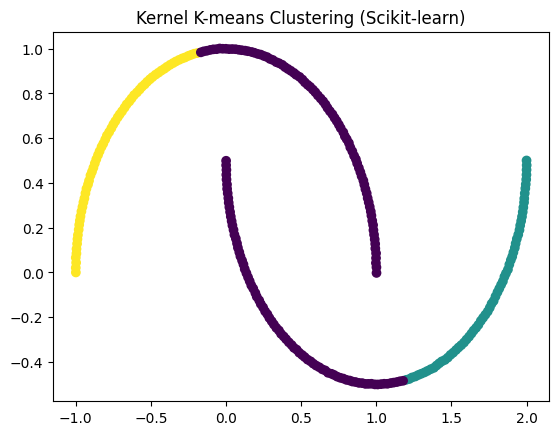

In [32]:
from sklearn.cluster import SpectralClustering

# Create a Spectral Clustering model using scikit-learn with RBF kernel
sklearn_labels = SpectralClustering(n_clusters=n_clusters, gamma=3, affinity='rbf', random_state=0).fit_predict(X)

# Plot data points with colors based on cluster assignments (scikit-learn)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis')
plt.title('Kernel K-means Clustering (Scikit-learn)')
plt.show()


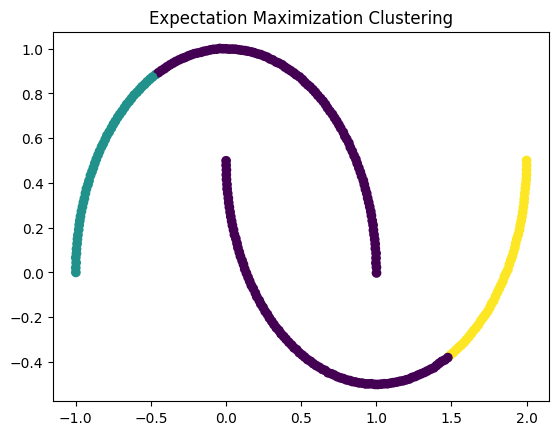

In [33]:
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture model using scikit-learn
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
em_labels = gmm.fit_predict(X)

# Plot data points with colors based on cluster assignments (EM clustering)
plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='viridis')
plt.title('Expectation Maximization Clustering')
plt.show()


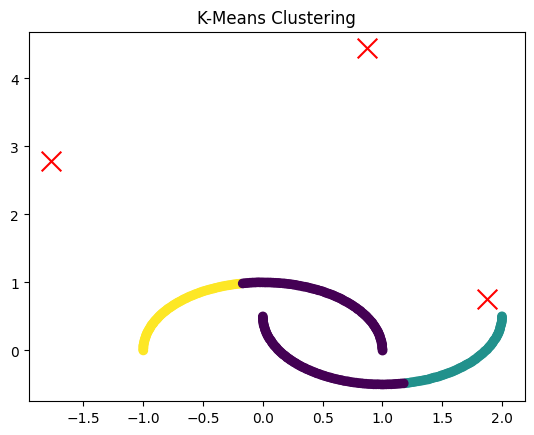

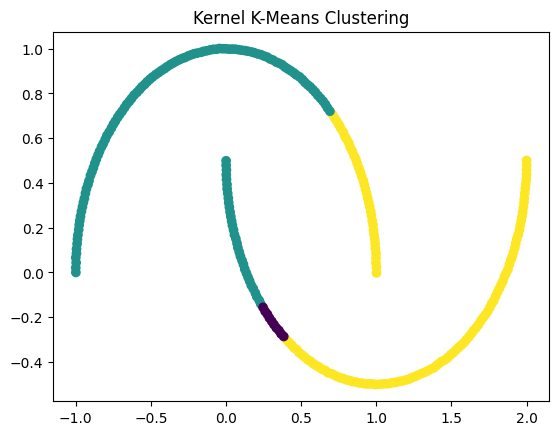

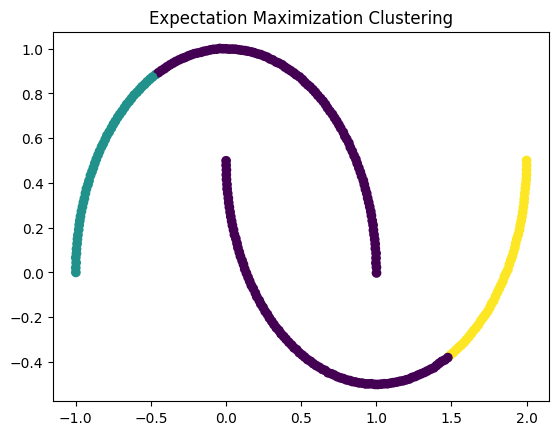

In [34]:
import matplotlib.pyplot as plt

# Plot K-Means results
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis')
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], c='red', marker='x', s=200, label='K-Means Centroids')
plt.title('K-Means Clustering')

# Plot Kernel K-Means results
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis')
plt.title('Kernel K-Means Clustering')

# Plot EM (Expectation Maximization) results
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='viridis')
plt.title('Expectation Maximization Clustering')

plt.show()


In [35]:
from sklearn.metrics import adjusted_rand_score

# Compare cluster assignments of K-Means and Kernel K-Means
kmeans_vs_kernel_kmeans = adjusted_rand_score(sklearn_labels, my_labels)

# Compare cluster assignments of K-Means and EM
kmeans_vs_em = adjusted_rand_score(sklearn_labels, em_labels)

# Compare cluster assignments of Kernel K-Means and EM
kernel_kmeans_vs_em = adjusted_rand_score(my_labels, em_labels)

print(f"Adjusted Rand Index (K-Means vs. Kernel K-Means): {kmeans_vs_kernel_kmeans:.2f}")
print(f"Adjusted Rand Index (K-Means vs. EM): {kmeans_vs_em:.2f}")
print(f"Adjusted Rand Index (Kernel K-Means vs. EM): {kernel_kmeans_vs_em:.2f}")


Adjusted Rand Index (K-Means vs. Kernel K-Means): 0.18
Adjusted Rand Index (K-Means vs. EM): 0.70
Adjusted Rand Index (Kernel K-Means vs. EM): 0.10


In [36]:
data['Cluster'] = sklearn_labels  # Assign the cluster labels from K-Means

# Step 1: Calculate the percentage of patients who experienced a DEATH_EVENT in each cluster
cluster_deaths = data.groupby('Cluster')['DEATH_EVENT'].mean() * 100

print("Percentage of DEATH_EVENT in Each Cluster:")
print(cluster_deaths)

Percentage of DEATH_EVENT in Each Cluster:
Cluster
0    31.137725
1    31.818182
2    34.848485
Name: DEATH_EVENT, dtype: float64


# Regression Task

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
#2.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#2.2: Perform Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# 2.3: Implement Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can tune the alpha parameter as needed
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# 2.4: Evaluate the performance using Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Mean Squared Error for Linear Regression:", mse_linear)
print("Mean Squared Error for Ridge Regression:", mse_ridge)

Mean Squared Error for Linear Regression: 0.25237239935868566
Mean Squared Error for Ridge Regression: 0.2523185649073308


* The Mean Squared Error (MSE) values for both Linear Regression and Ridge Regression are very close, which suggests that the two models have similar performance on your dataset. A lower MSE indicates better predictive accuracy. In this case, the difference in MSE between Linear Regression and Ridge Regression is minimal, which means that Ridge Regression's regularization (L2 penalty) did not significantly impact the model's performance.

* When choosing between Linear Regression and Ridge Regression, it's important to consider other factors as well, such as model interpretability, potential overfitting, and the trade-off between bias and variance.

# Classification

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
bayesian_classifier = GaussianNB()
bayesian_classifier.fit(X_train, y_train)

# Step 3: Implement k-Nearest Neighbors (KNN) classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train, y_train)

# Step 4: Evaluate the performance of each classification model using accuracy
y_pred_bayesian = bayesian_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

accuracy_bayesian = accuracy_score(y_test, y_pred_bayesian)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Bayesian Classifier (Gaussian Naive Bayes) Accuracy:", accuracy_bayesian)
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_knn)

Bayesian Classifier (Gaussian Naive Bayes) Accuracy: 0.6166666666666667
K-Nearest Neighbors (KNN) Accuracy: 0.5833333333333334


*  the suitability of each classification method for identifying patients at risk depends on the nature of the data, the relationships between features, and the trade-offs between computational efficiency and model complexity. While Gaussian Naive Bayes is straightforward and fast, it might not capture complex dependencies. K-Nearest Neighbors is more flexible but needs careful parameter tuning.

# Summary

* In cardiovascular medicine, a combination of these techniques, along with domain expertise, can improve patient risk assessment and decision-making. Clustering provides insights into patient heterogeneity, regression quantifies feature-outcome relationships, and classification identifies patients at risk. Understanding the strengths and weaknesses of each approach and integrating their results can enhance clinical care and research in cardiovascular health.